# K-NN and Model Deployment

* K-nn'de Küçük bir K değeri overfitting'e yol açabileceği gibi büyük bir K değeri de underfitting'e neden olabilir. Yüksek K değeri overfitting'i önlememize yardımcı olabilir. Fakat Portilla'nın örneğinde olduğu gibi küçük hata veresede daha yüksek bir K değeri seçildiğinde özellikle veri kümenizin kenar değerlerinde ve sınıf karar sınırlarında (desicion boundry) tahmin gücünü kaybetmeye başlayabilirsiniz. İdeali, küçük K ve küçük hata değerlerinde optimum çözüm bulamaya çalışmak.

In [117]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [118]:
df=pd.read_pickle("diabetes.pkl")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               707 non-null    int64  
 1   Glucose                   707 non-null    int64  
 2   BloodPressure             707 non-null    int64  
 3   SkinThickness             707 non-null    int64  
 4   Insulin                   707 non-null    int64  
 5   BMI                       707 non-null    float64
 6   DiabetesPedigreeFunction  707 non-null    float64
 7   Age                       707 non-null    int64  
 8   Outcome                   707 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.2 KB


In [120]:
df.shape

(707, 9)

In [121]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,3.701556,121.734088,72.480905,21.295615,85.261669,32.372136,0.475614,33.138614,0.338048
std,3.120804,30.657294,12.012063,15.421519,117.940450,6.847274,0.333568,11.729024,0.473380
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,49.000000,32.100000,0.378000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,133.500000,36.500000,0.630000,40.000000,1.000000
max,12.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


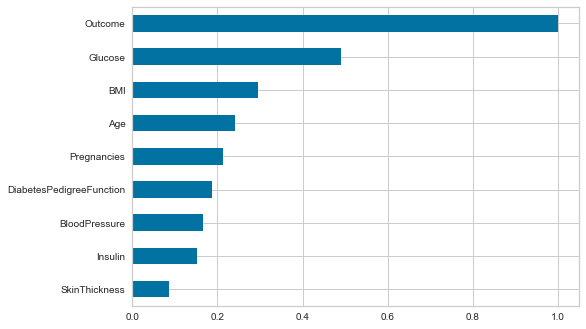

In [122]:
df.corr()["Outcome"].sort_values().plot.barh();

In [123]:
# sns.pairplot(df);

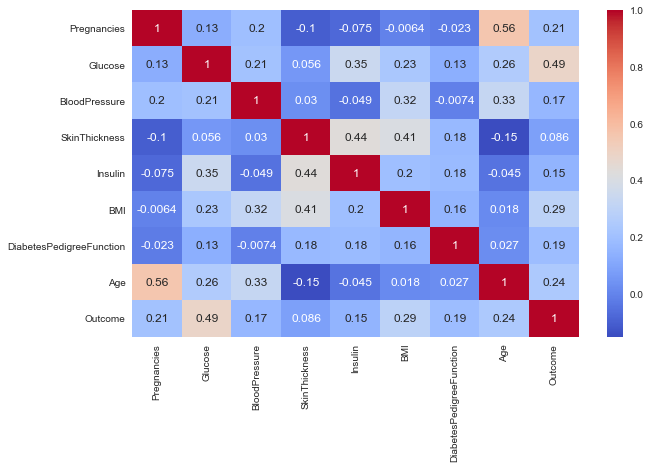

In [124]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True);

## Outlier Analysis

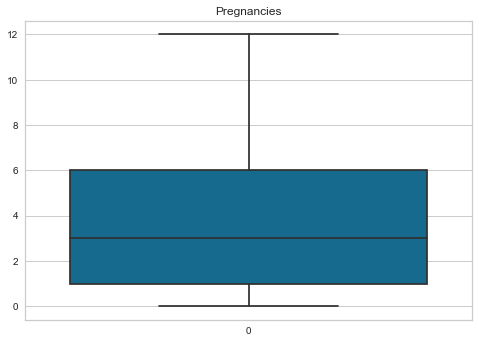

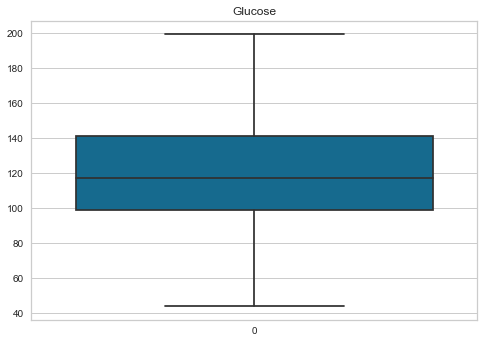

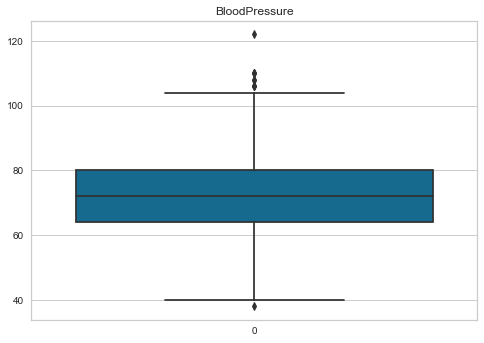

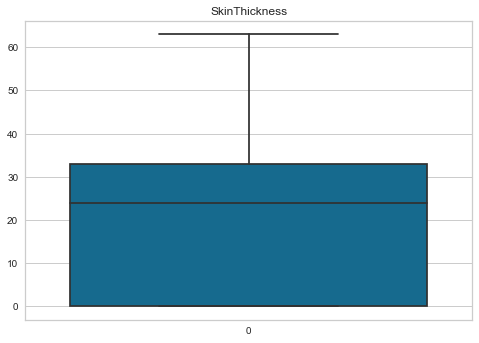

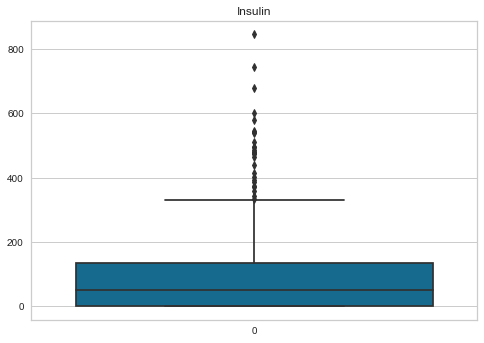

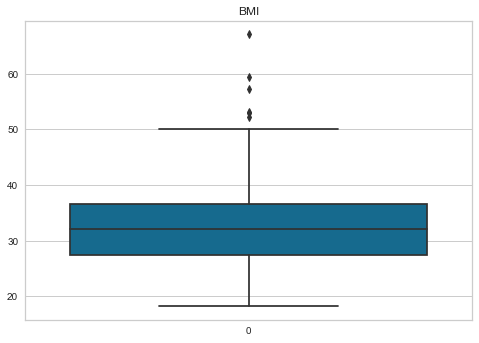

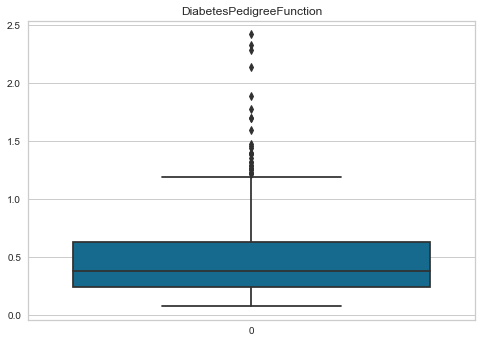

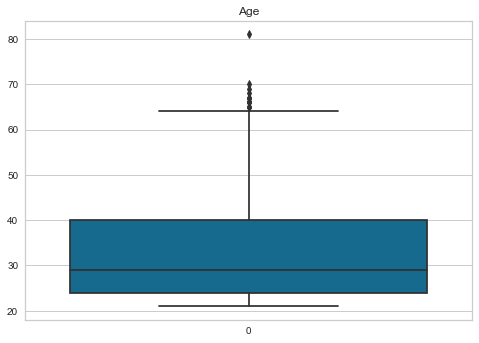

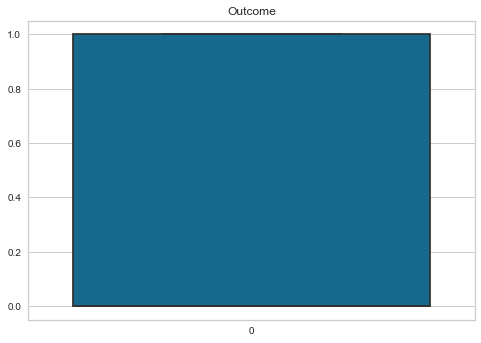

In [125]:
for i in df.columns:
    plt.figure(i)
    sns.boxplot(data=df[i], orient='v')
    plt.title(i) 

## Modelling

### 1-Logistic Regression

In [126]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [128]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [129]:
y_pred=model.predict(X_test)

In [130]:
print(*confusion_matrix(y_test,y_pred), sep="\n")

[126  20]
[25 42]


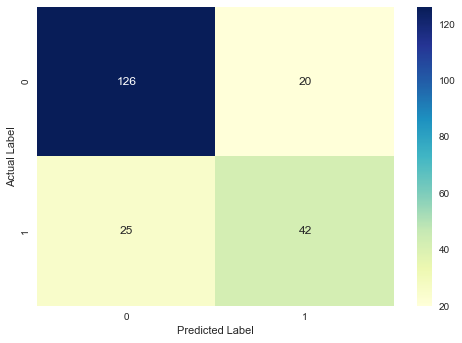

In [131]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       146
           1       0.68      0.63      0.65        67

    accuracy                           0.79       213
   macro avg       0.76      0.74      0.75       213
weighted avg       0.79      0.79      0.79       213



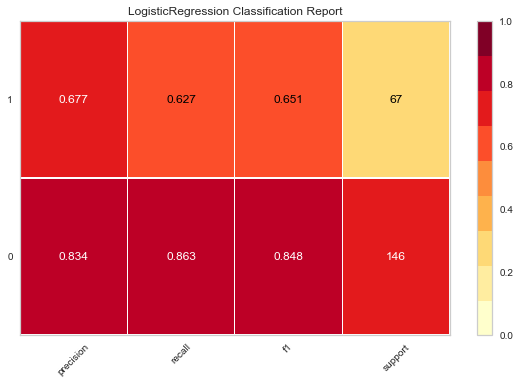

In [133]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

### 2-KNN

Used for both classification and Regression

Non parametric ML Algorithm

Lazy algorithm as KNN does not have a training step

Sensitive to outliers, accuracy is impacted by noise or irrelevant data.

K is K nearest neighbors.

K should be an odd number.

required scaling

In [134]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
74,1,79,75,30,0,32.0,0.396,22
13,1,189,60,23,846,30.1,0.398,59
401,6,137,61,0,0,24.2,0.151,55
634,10,92,62,0,0,25.9,0.167,31
197,3,107,62,13,48,22.9,0.678,23


In [135]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,3.696356,121.362348,72.536437,21.216599,83.748988,32.447571,0.474142,33.172065
std,3.087124,29.868887,11.833432,15.186990,116.644576,6.743599,0.339204,11.731303
min,0.000000,56.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.800000,0.240250,24.000000
50%,3.000000,116.000000,72.000000,24.000000,46.500000,32.150000,0.372500,29.000000
75%,6.000000,140.000000,80.000000,33.000000,130.000000,36.750000,0.635500,41.000000
max,12.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,67.000000


##### Scaling

* Burada Splitting den sonra scale yaptik. Splitten once scale yapmak tercih edilmemeli, cunku model, scale dahil hicbirseyi test datasindan ogrenmemeli.

* Scaling yapinca z-score donusumu yapar. Yukarida; ortalama yas 33, std:12, Age sutununda tum degerlere 33 ten kac std uzakta oldugunu atar

In [136]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
pd.DataFrame(X_train, columns=X.columns).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.874306,-1.419714,0.208398,0.578937,-0.718712,-0.066437,-0.230602,-0.953295
1,-0.874306,2.266781,-1.060482,0.117549,6.541442,-0.348471,-0.224700,2.203857
2,0.746967,0.524074,-0.975890,-1.398441,-0.718712,-1.224262,-0.953614,1.862543
3,2.043985,-0.984038,-0.891298,-1.398441,-0.718712,-0.971915,-0.906397,-0.185339
4,-0.225797,-0.481334,-0.891298,-0.541577,-0.306789,-1.417233,0.601600,-0.867966


In [138]:
# model=KNeighborsClassifier().fit(X_train, y_train)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [139]:
from sklearn.metrics import classification_report,confusion_matrix
print(*confusion_matrix(y_test,y_pred), sep="\n")

[110  36]
[28 39]


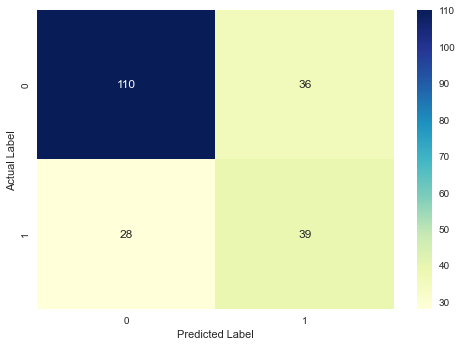

In [140]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       146
           1       0.52      0.58      0.55        67

    accuracy                           0.70       213
   macro avg       0.66      0.67      0.66       213
weighted avg       0.71      0.70      0.70       213



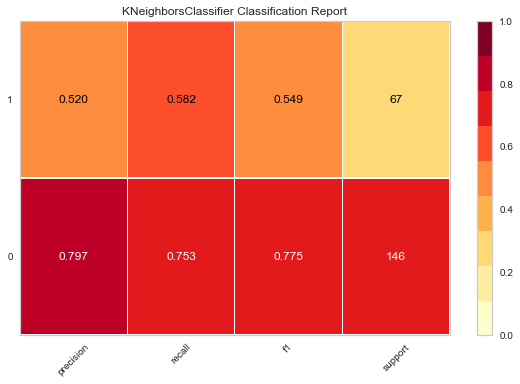

In [142]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

### Model Tunning (GridSeachCV)

* Machine Learningde Model Tunning GridSearchCV ile yapilir. Evrenseldir, butun modellerde kullanilir. 

* LassoCV ve RidgeCV kullandik daha once, ama onlarda da GridSearchCV kullanabiliriz. LassoCV, RidgeCV o modellere ozgu oldugu icin kullanildi.

* GridSerach te denenecek parametreleri girersiniz, GridSerach dener. Sonucta optimal olani alip kullanirsiniz, duruma gore manuel oynamalar yapabilirsiniz. GridSearch un verdigi parametre %100 en iyisi denilemez. Fikir verir.

In [143]:
# bos bir model tanitimi yapariz
knn = KNeighborsClassifier()

In [144]:
knn_params = {"n_neighbors": range(1,50,2)}
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)
knn_cv_model.best_params_

{'n_neighbors': 13}

* GridSearchCV, optimum k yi, default olarak accuracy e gore veriyor. Bu nedenle fikir verir, kesin degildir.
* GridSearchCV de ogrenmemis modeli(knn) de parametre olarak GridSearchCV icine koyariz, 
* LassoCV ve RidgeCV de modele ozel oldugu icin ogrenmis modelde deneme yapiyor, tekrardan modeli parametre olarak icine koymuyoruz

In [145]:
knn_tuned = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)

In [146]:
y_pred = knn_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.65      0.48      0.55        67

    accuracy                           0.76       213
   macro avg       0.72      0.68      0.69       213
weighted avg       0.74      0.76      0.74       213



### GridSearch with Recall

* Optimum k yi, recall e gore hesaplatalim. scoring = "recall"

* k ya buyuk deger verince underfitinge dogru gider, basit olur.

* ayni scoru veriyorsa, kucuk k degeri tercih edilir.

* k>20 secilmesi cok nadir bir durumdur. Tercih edilmez. K> 20 olmasi icin, data setinde verilerin cok girift olmasi gerekir.

In [147]:
# knn = KNeighborsClassifier()
# knn_params = {"n_neighbors": range(1,50,2)} # k tek sayi olmali

knn_cv_model = GridSearchCV(knn, knn_params, scoring = "recall", cv=10).fit(X_train, y_train)

In [148]:
knn_cv_model.best_params_

{'n_neighbors': 1}

In [149]:
knn_tuned= KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       146
           1       0.52      0.58      0.55        67

    accuracy                           0.70       213
   macro avg       0.66      0.67      0.66       213
weighted avg       0.71      0.70      0.70       213



### Model Deployment

* iki model denedik, Logistic Regression da F1 Score daha yuksek ciktigi icin onu deploy edecegiz.
* Normalde 5 model denenir, en iyisi deploy edilir.

In [150]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       146
           1       0.68      0.63      0.65        67

    accuracy                           0.79       213
   macro avg       0.76      0.74      0.75       213
weighted avg       0.79      0.79      0.79       213



### saving the model

In [151]:
# modeli export yapiyoruz
import pickle
pickle.dump(model, open("my_model", 'wb'))

In [152]:
# modeli import yapiyoruz
model = pickle.load(open("my_model", "rb"))

### predictions with the saved model

In [153]:
df["Pred"]=model.predict(X)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred
515,3,163,70,18,105,31.6,0.268,28,1,0
429,1,95,82,25,180,35.0,0.233,43,1,0
224,1,100,66,15,56,23.6,0.666,26,0,0
338,9,152,78,34,171,34.2,0.893,33,1,1
108,3,83,58,31,18,34.3,0.336,25,0,0
672,10,68,106,23,49,35.5,0.285,47,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
379,0,93,100,39,72,43.4,1.021,35,0,0
102,0,125,96,0,0,22.5,0.262,21,0,0
200,0,113,80,16,0,31.0,0.874,21,0,0


In [154]:
pred_prob = model.predict_proba(X)
pred_prob

array([[0.27744966, 0.72255034],
       [0.90945882, 0.09054118],
       [0.22692922, 0.77307078],
       ...,
       [0.79607425, 0.20392575],
       [0.78849657, 0.21150343],
       [0.86910549, 0.13089451]])

* pred_prob[:,0] :O olma ihtimali
* pred_prob[:,1] :1 olma ihtimali

In [155]:
df["Prob"]=pred_prob[:,1]
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,Prob
648,11,136,84,35,130,28.3,0.260,42,1,1,0.515199
334,1,95,60,18,58,23.9,0.260,22,0,0,0.075146
228,4,197,70,39,744,36.7,2.329,31,0,1,0.973368
303,5,115,98,0,0,52.9,0.209,28,1,1,0.529756
516,9,145,88,34,165,30.3,0.771,53,1,1,0.670599
526,1,97,64,19,82,18.2,0.299,21,0,0,0.047244
362,5,103,108,37,0,39.2,0.305,65,0,0,0.236407
565,2,95,54,14,88,26.1,0.748,22,0,0,0.217592
356,1,125,50,40,167,33.3,0.962,28,1,1,0.592212
689,1,144,82,46,180,46.1,0.335,46,1,1,0.520003


* prob is probability, pred is prediction 
* if prob>0.5, pred=1 otherwise pred=0 

### prediction for a single patient

In [156]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [157]:
my_dict={'Pregnancies':10, 
        'Glucose':180, 
        'BloodPressure':70,
        'SkinThickness':30,
        'Insulin':50,
        'BMI':38, 
        'DiabetesPedigreeFunction':0.15,
        'Age':50}

In [158]:
df_sample=pd.DataFrame([my_dict])
df_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,180,70,30,50,38,0.15,50


In [159]:
single_pred=model.predict(df_sample)
print(single_pred)

[1]


In [160]:
single_pred_prob=model.predict_proba(df_sample)
print(single_pred_prob[:,1])

[0.86946287]
